
## Assignment List (80 points)
**Make sure you excute every cell in order, and reserve the outputs of every cell.**
1. Transform and plot image. (15 points)
2. Data loading. (10 points)
3. Train the baseline model and plot the learning curve. (15 points)

4. Comparison and analysis (20 points)
    * Compare the training results of 5, 20, and 50 epochs.
    * Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer. 
    * Try a different data_transform function 
5. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results? (10 points)
6. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) and share your prediction. (10 points)
    * Does the model you trained get it right? 
    * If not, what do you think you could do to improve it?
    
## Advanced options (20 points)
**Make sure you excute every cell in order, and reserve the outputs of every cell.**
- A1: Train a complicated model on the dataset (ResNet18) (10 points) \
    **Remenber to resize the image data and recall dataloader**.
- A2: Compare the performance of a simple model (provided by the template) and the complicated model. (5 points)
      Plot learning curves in the same figure axes
- A3: Usage of git version control (5 points)
      Git add, git commit, git log, insert a screenshot within this notebook

### Deadline: 12.00 am 16/01/2023
### Submmit this notebook and the model file (resnet.py) to brightspace under the unit of **Machine Learning for Media Production**

## 0. Importing PyTorch and setting up device-agnostic code

In [ ]:
import torch
from torch import nn

# Note: this notebook requires torch >= 1.10.0
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.__version__, device


## 1. Get data
[Food101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/) is popular computer vision benchmark as it contains 1000 images of 101 different kinds of foods, totaling 101,000 images (75,750 train and 25,250 test).
In this assignment, only 3 classes are used to form a small classification dataset, it contains pizza, steak and sushi.
And instead of 1,000 images per class, ervey image class only has 100 images(10%).


In [ ]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/lizhiqihhh/AIM-MLWorkshop/raw/main/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

In [ ]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

## Task 1

1. Transform training dataset and testing dataset.
2. Plot images 


## 1.1 Transforming data


In [ ]:
# import libraries and packages
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
# Write transform for image
data_transform = transforms.Compose([
    # Step 1: Resize the images to 64x64
    # Resize the images to 64x64x3 (64 height, 64 width, 3 color channels)
    
    # Step 2: Turn the image into a torch.Tensor
    # converts all pixel values from 0-255 to be between 0-1  
    
    # Step 3: RandomHorizontalFlip---Flip the images randomly on the horizontal p = probability of flip, 0.5 = 50% chance 
    
])

In [ ]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root='?', # root should be the target folder of images
                                  transform='?', # transform should be a set of transform functions to perform on images
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root='?', # it should be the folder of test data 
                                 transform='?') # same with transform applied to train_data

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

In [ ]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root='?', 
                                  transform='?', 
                                  target_transform=None)

test_data = datasets.ImageFolder(root='?', 
                                 transform='?') 

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

In [ ]:
len(train_data), len(test_data)

## 1.2 Plot the transformed image
`Plot_imgs` and `plot_transformed_images` are defined in plot.py, complete the contents in plot.py 

In [ ]:
from pathlib import Path
from plot import Plot_imgs
# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# Plot an image using matplotlib
# Please complete the plot.py before use this plotting function
Plot_imgs(image_path)

In [ ]:
from plot import plot_transformed_images
image_path_list = list(image_path.glob("*/*/*.jpg"))
plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)

In [ ]:
# Get class names as a list
class_names = train_data.classes
# Try index on the `train_data` and `test_data` `Dataset`'s to find samples and their target labels.
img, label = train_data[0][0], train_data[0][1]
# Print the shape/content/datatype of img and label
print()
print()

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")


# ---------------Plot the permuted image-------------
plt.figure()
plt.imshow()
# ---------------End of code------------------------
plt.axis("off")
plt.title(class_names[label], fontsize=14)

## 1.3 Turn loaded images into `DataLoader`'s

## Task 2: Turn train and test Datasets into DataLoaders (10 points)

In [ ]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader() # shuffle training data

test_dataloader = DataLoader() # don't usually need to shuffle testing data

train_dataloader, test_dataloader

In [ ]:
# Load a batch of images in the training dataset
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

`display_random_images` is defined in plot.py, please complete the contents in `plot.py`

In [ ]:
# Display random images from Dataset
from plot import display_random_images
display_random_images(train_data, 
                      n=12, 
                      classes=class_names,
                      seed=None)

## Task 3 Model_0 training
### Task 3.1 Train the baseline model TinyVGG


In [ ]:
from TinyVGG import TinyVGG # import the model from TinyVGG.py
torch.manual_seed(42)

# --------------Initialize the TinyVGG model--------------
'''
    Parameters: input_shape
                hidden_units
                output_shape
'''
model_0 = TinyVGG().to(device) 
# -------------------  End of code -----------------------

model_0 # Print the model info here!

In [ ]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

In [ ]:
# Load the training function from TinyVGG.py
from TinyVGG import train
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# ------------------------- Train model_0 --------------------------
# Fill in the parentheses with parameters needed in the train function
model_0_results = train()
# -------------------------  End of code  --------------------------
# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

### Task 3.2: Plot the loss curves of Model_0

From the print outs of our `model_0` training, it didn't look like it did too well.

Create a function to plot the values in the `model_0_results` dictionary.

In [ ]:
from typing import Tuple, Dict, List
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    train_loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    train_accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # --------------- Complete the following lines --------------
    # Plot loss, please include label, title, and legend in the figure
    plt.subplot(1, 2, 1)
    plt.plot()   # plot epochs, train_loss
    plt.plot()   # plot epochs, test_loss
    plt.title('')
    plt.xlabel('')
    plt.legend()
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot() # plot epochs, train_accuracy, add label
    plt.plot() # plot epochs, test_accuracy, add label
    plt.title('')
    plt.xlabel('')
    plt.legend()
    # ---------------------- End of codes -----------------------

In [ ]:
plot_loss_curves(model_0_results)

`torchinfo` comes with a `summary()` method that takes a PyTorch model as well as an `input_shape` and returns what happens as a tensor moves through your model.


In [ ]:
try: 
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size

## Task 4: Comparison and analysis


### Task 4.1 Try different epochs


In [ ]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# create a new instance of TinyVGG model
model_e_5 = TinyVGG().to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_e_5.parameters(), lr=0.001)

model_e_5_results = train()

In [ ]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_e_20 = TinyVGG()

loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_e_20.parameters(), lr=0.001)

model_e_20_results = train()

In [ ]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_e_50 = TinyVGG()

loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_e_50.parameters(), lr=0.001)

model_e_50_results = train()

### Compare: Print the differences

In [ ]:
import pandas as pd 
model_compare_1 = pd.DataFrame(model_e_5_results)
model_compare_2 = pd.DataFrame(model_e_20_results)
model_compare_3 = pd.DataFrame(model_e_50_results)

model_compare_1

### Analysis: What you find and how to improve model_0's performance?

**Your answer**:

### Task 4.2 Try different data transform functions

In [ ]:
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
# --------- Create training transform with TrivialAugment ---------
# TrivialAugment: Tuning-Free Yet State-of-the-Art Data Augmentation (source:https://arxiv.org/abs/2103.10158)
train_transform_trivial_augment = transforms.Compose([
    # Resize

    # RandomHorizontalFlip

    # TrivialAugment

    # ToTensor
    
])

train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)

train_dataloader_augmented = DataLoader()
test_dataloader_simple = DataLoader()
# ---------------------- End of code ----------------------

train_dataloader_augmented, test_dataloader

In [ ]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG()
model_1 # print model_1

In [ ]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# ------------------------- Train model_1 ----------------------------
# Fill in the parentheses with parameters needed in the train function
model_1_results = train()
# ------------------------- End of model_1 ---------------------------
# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

## Task 5: Double the number of hidden units in your model and train it for 20 epochs

In [ ]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_2 = TinyVGG().to(device) # use 20 hidden units instead of 10

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)

model_2_results = train() # train for 20 epochs

## Task 6: Make prediction on a custom image based on model_2


In [ ]:
# Read a custom image from img_path and represent it as a tensor datatype
import torchvision

img_path = './data/'
custom_image = img_path + "img.jpeg"
img = torchvision.io.read_image(custom_image)


In [ ]:
# Make a prediction on the image, put model_2 in eval mode
model_2.eval()
with torch.inference_mode():
  # Get image pixels into float + between 0 and 1
  img = img / 255.
  # -------------------- Complete the following lines ---------------------
  # Resize image to 64x64
  resize = transforms.Resize()
  img = resize(img)
  print('Resized image shape: \n',img.shape)
  # Turn image in single batch and pass to target device
  # add an additional dimension to img using unsqueeze()
  batch_img = img # modify this line!!!
  print('Add batch dim: \n', batch_img.shape)
  # Predict on image
  y_pred_logit = model_2(batch_img) 
  # ---------------------   End of code    ------------------------------
  # Convert pred logit to pred label
  pred_label = torch.argmax(y_pred_logit, dim=1)

# Plot the image and prediction
plt.imshow(img.permute(1, 2, 0))
plt.title(f"Pred label: {class_names[pred_label]}")
plt.axis(False)
     


### Analysis
Does the model you trained get it right?
If not, how to improve it?\
**Your answer:**

## Advanced tasks
### A1: Train a complicated model (Use ResNet18 as an example) (10 points)

### Read `Resnet18_pytorch.py` and complete the model file
> If you finish `Resnet18_pytorch.py` correctly, run the following line will generate a vector with shape = ([1,3])

In [ ]:
%%bash
python3.9 Resnet18_pytorch.py

In [ ]:
from Resnet18_pytorch import ResNet, BasicBlock
torch.manual_seed(42)
model_resnet = ResNet(img_channels=3, num_layers=18, block=BasicBlock, num_classes=3).to(device)
model_resnet

### Preparing train dataloader and test dataloader


In [ ]:
BATCH_SIZE=32
NUM_WORKERS=2
# ----- Complete the following transform functions -----
train_transform_augment = transforms.Compose([
   
])
#  ----------------  End of code --------------------
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_augment)
train_dataloader_resnet = DataLoader()

test_dataloader_simple = DataLoader()

train_dataloader_resnet, test_dataloader

#### Start training

In [ ]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model
model_resnet_results = train()

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

### A2: Compare model performance (5 points)
Choose a previous model used in **Task 3** (model_0) or **Task 4** (model_1) to compare with ResNet18 model

In [ ]:
from torchinfo import summary
summary(model_resnet, input_size=[1, 3, 224, 224]) # do a test pass through of an example input size

### Plot the train_loss and test_loss of model_resnet and a previous model using subplot function

In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results) # Or model_1

model_resnet_df = pd.DataFrame(model_resnet_results)
model_0_df, model_resnet_df

In [ ]:
# ------ Complete subplot functions in the following lines -------
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss with label, title, legend
plt.subplot(2, 2, 1)




plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)




plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
 



plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)




plt.legend()

### A3: Git version control (5 points)
Please insert an image in the cell to show your git log

### Git version control advices
1. Create a remote repo, upload this notebote to the repo\
   **Take a screenshot of the inital status**
2. git clone (ssh link of the repo)
3. Make some modifications to the files
4. git add .
5. git commit -m "leave some message here"
6. git push
7. git log
8. check the remote repo, **Take a screenshot after git push operations**

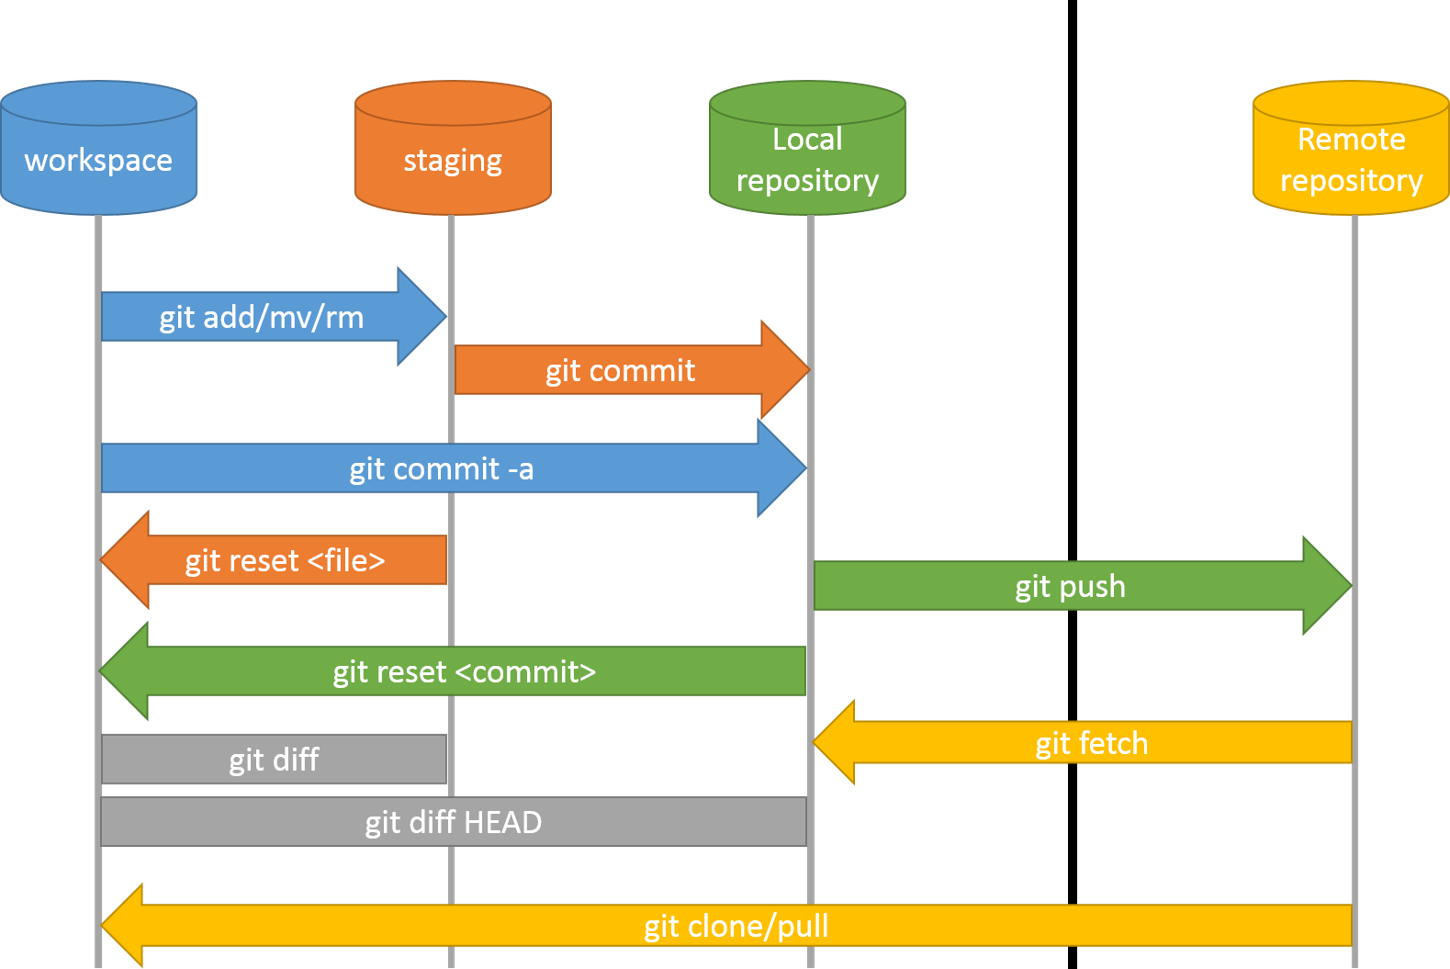

In [2]:
from IPython.display import Image
Image("./git-staging-workflow.png",width=900,height=500)

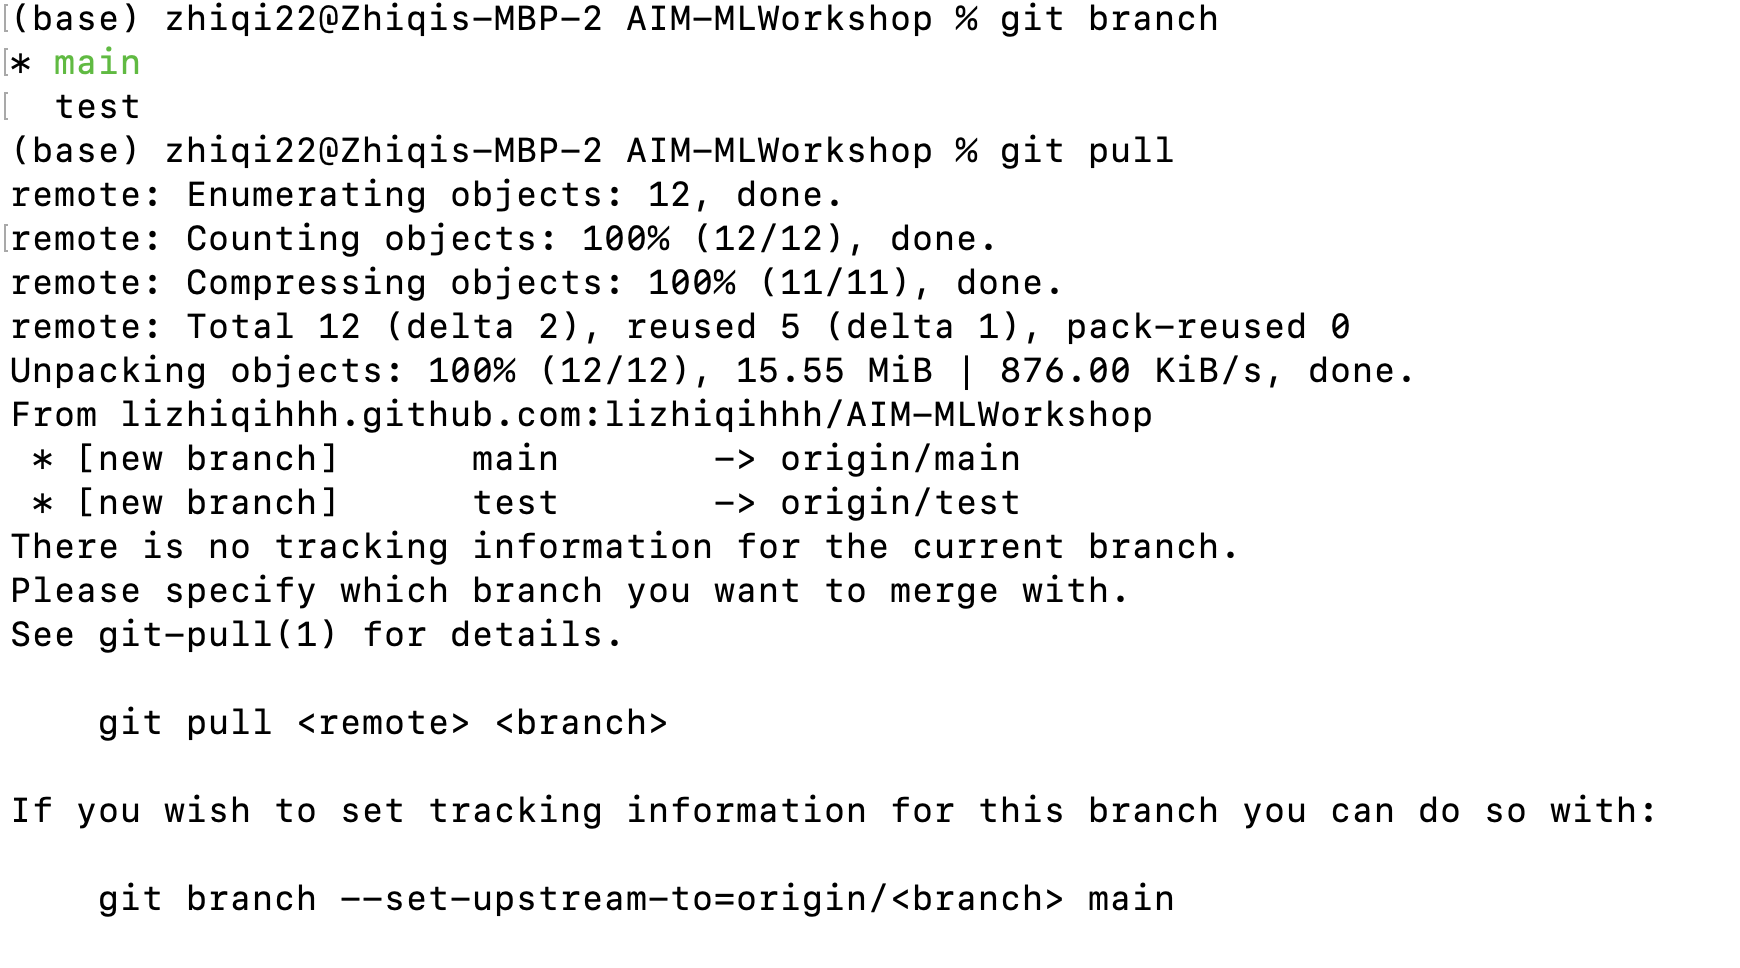

In [3]:
Image("git pull.png",width=994,height=655)

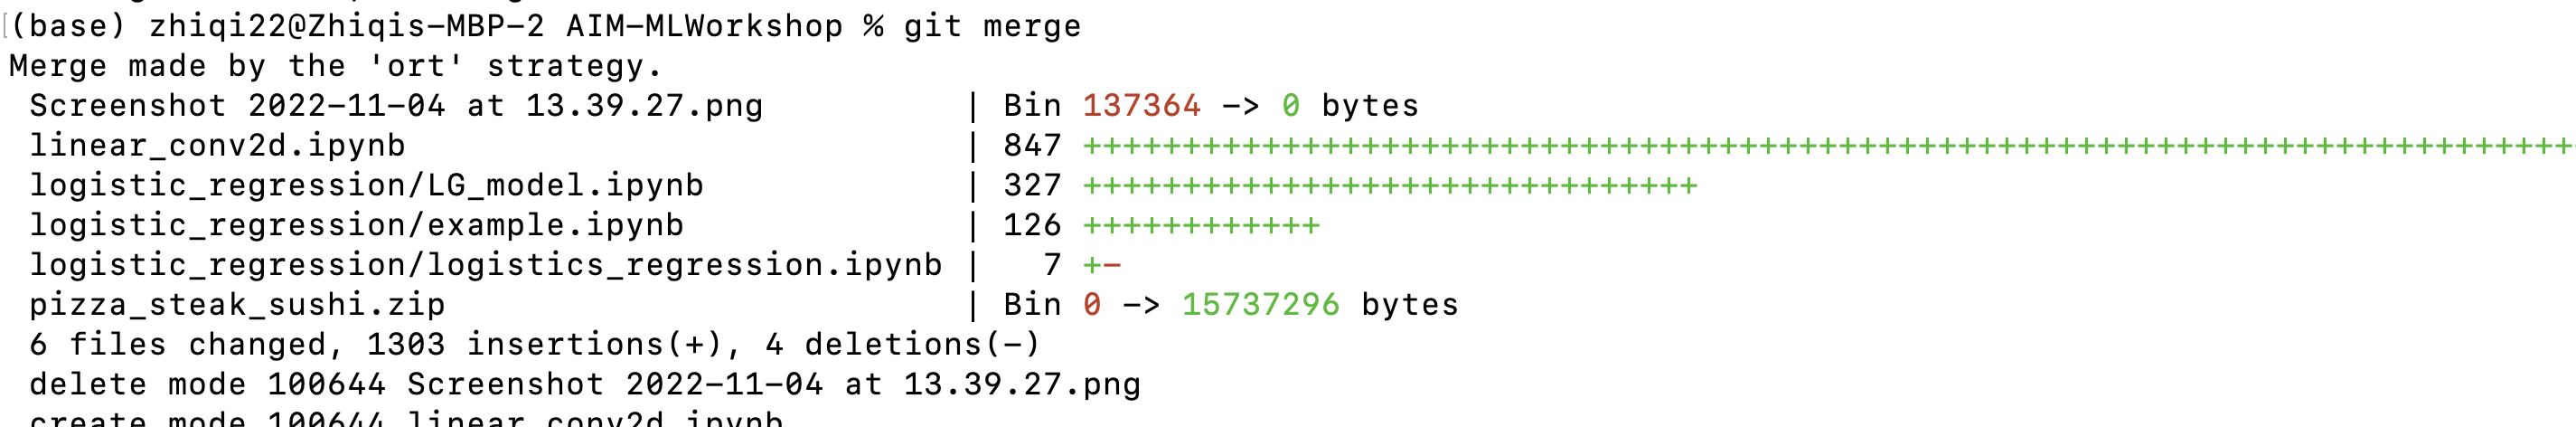

In [4]:
Image("git merge.png")

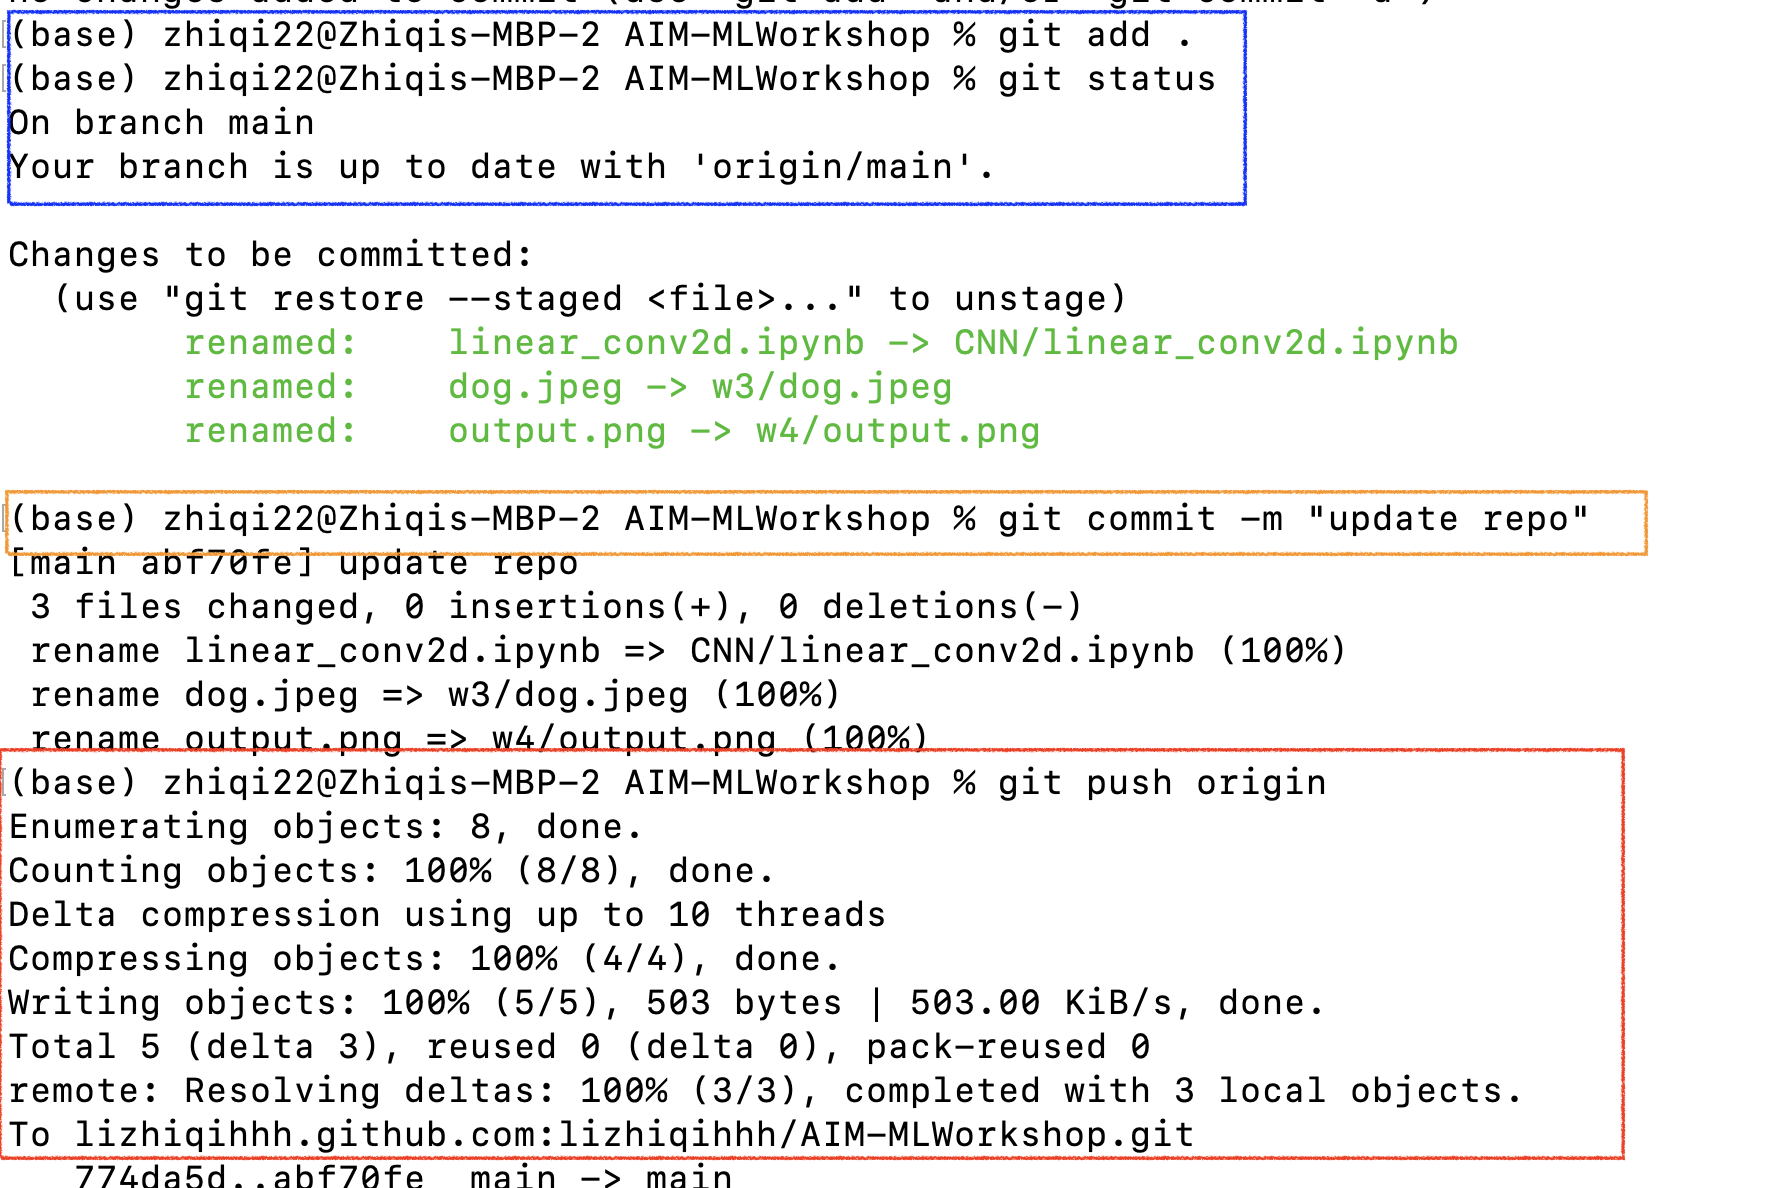

In [5]:
Image("git push steps.png")

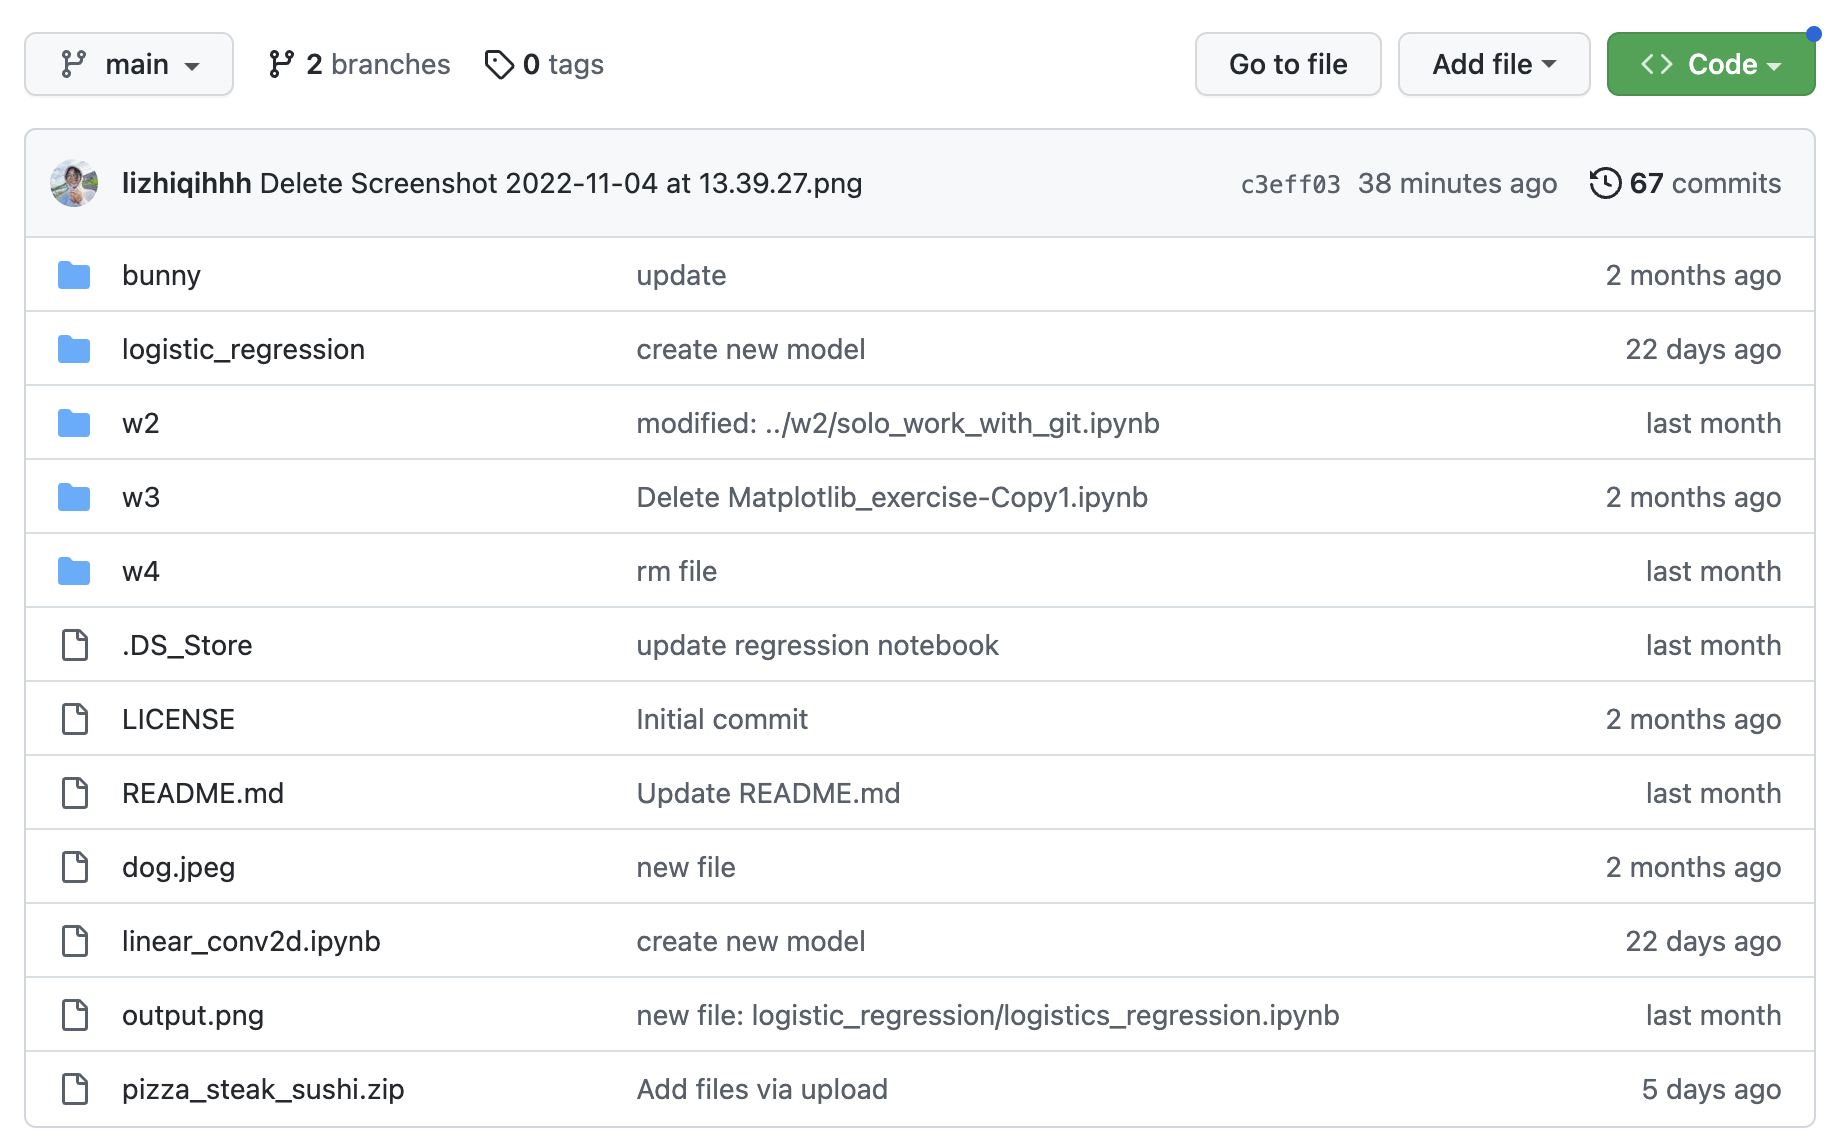

In [6]:
Image("before.png")

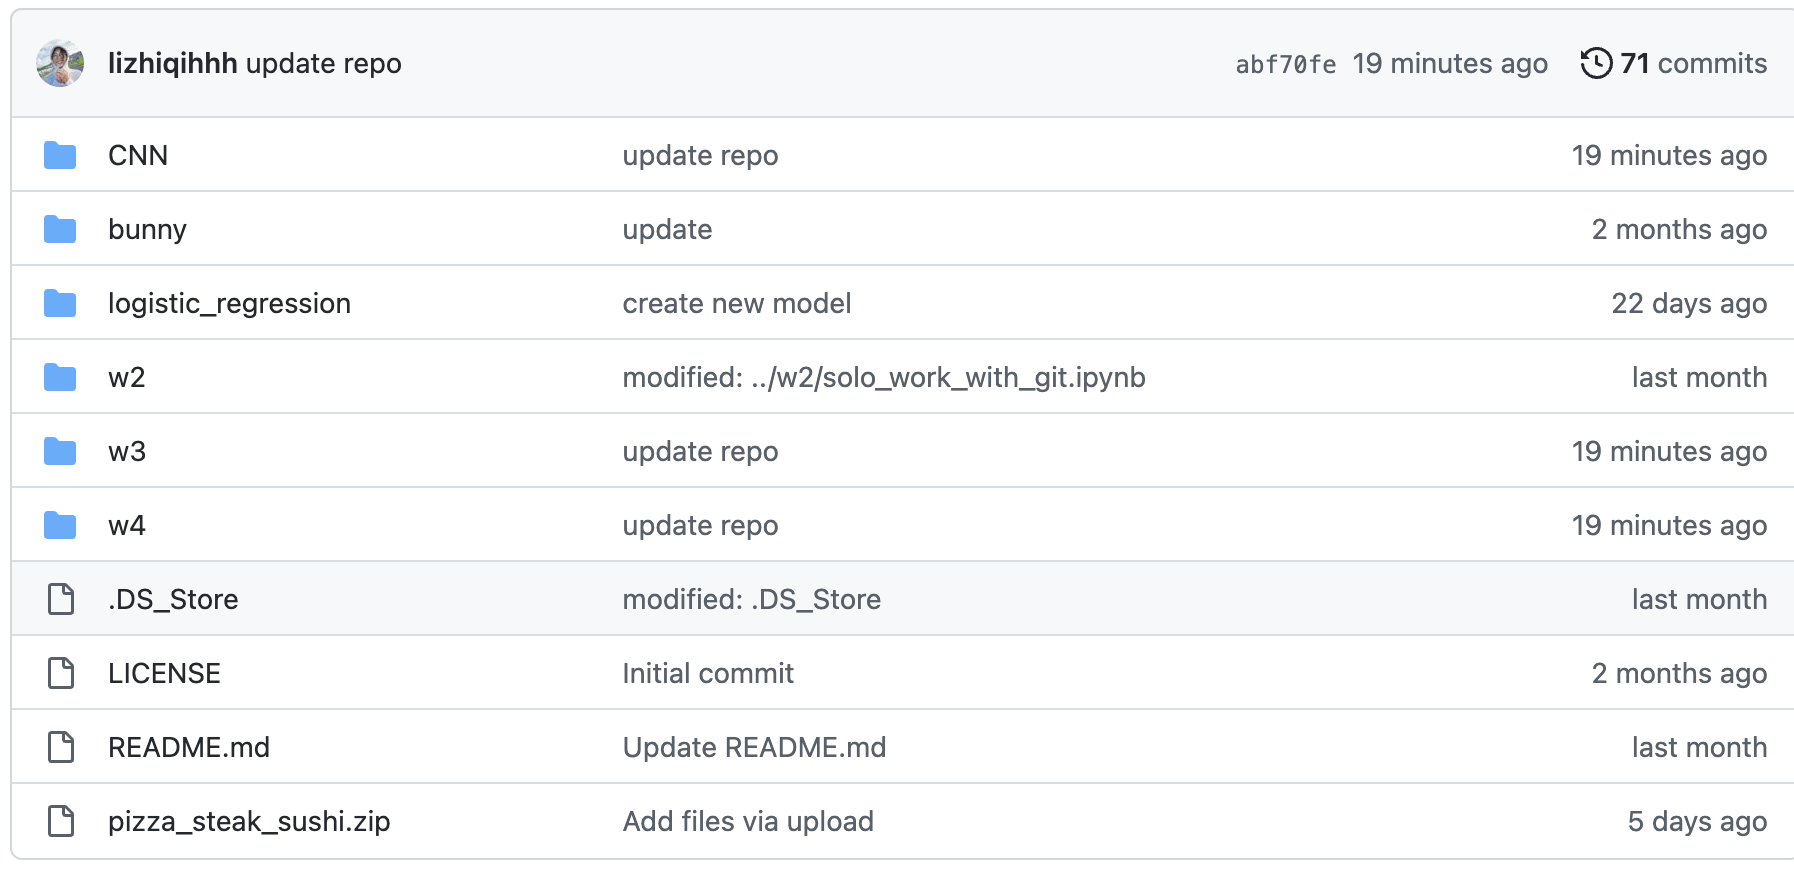

In [7]:
Image("after.png")

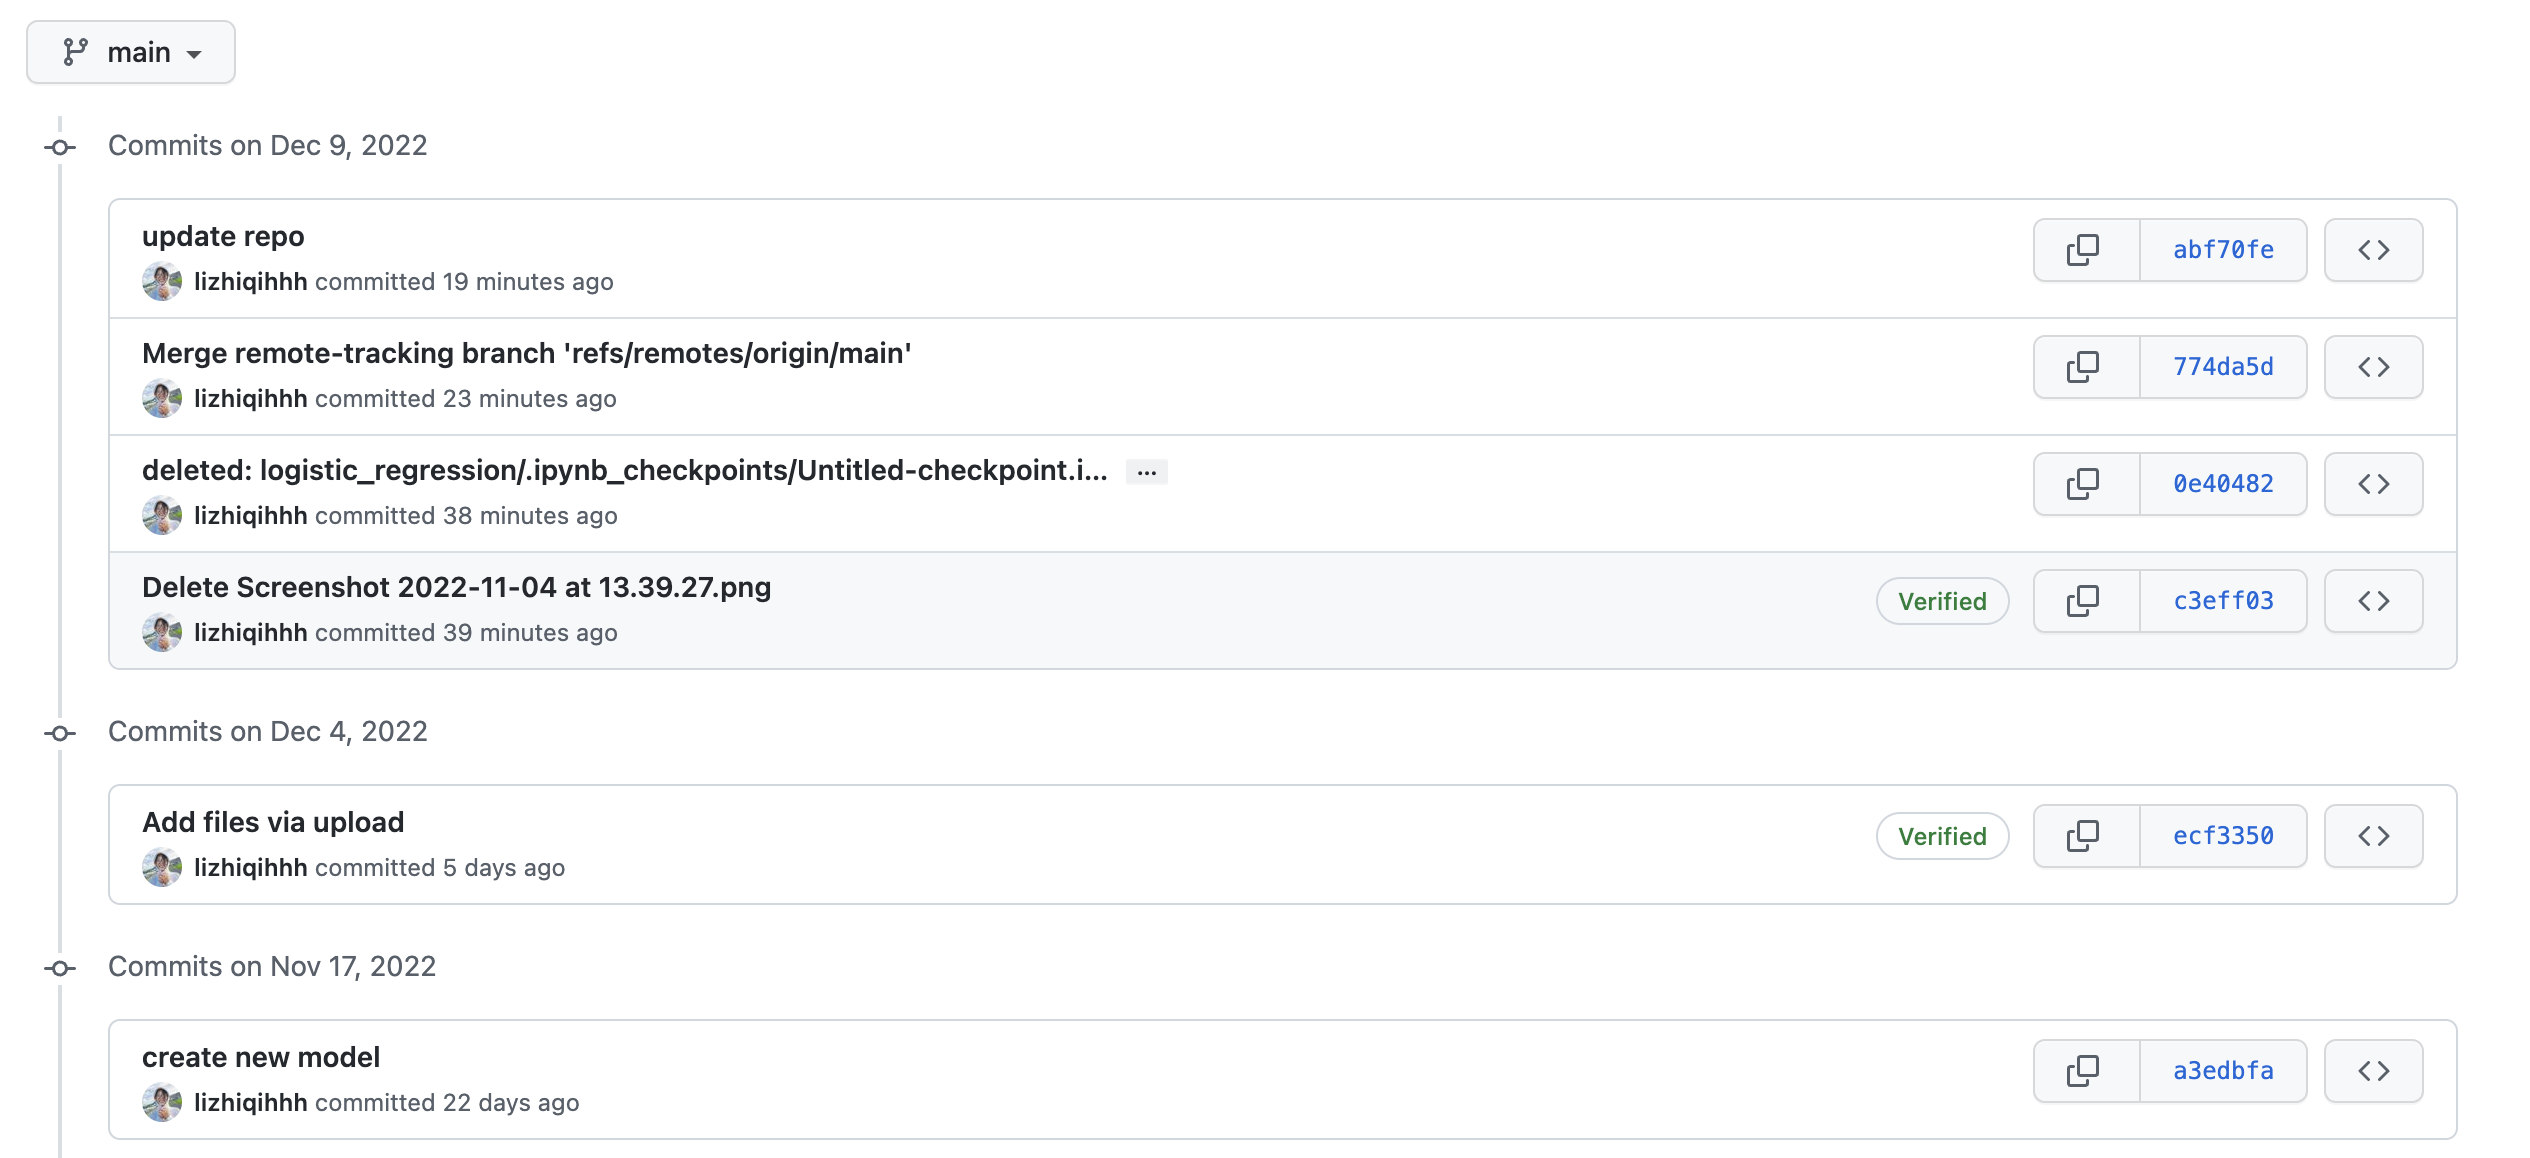

In [8]:
Image("gitlog.png")